In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:
# Reading the cleaned dataset
cleaned_ds_filepath ="data/steam_200k_cleaned_data.csv"
cleaned_df = pd.read_csv(cleaned_ds_filepath)

In [40]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128804 entries, 0 to 128803
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user           128804 non-null  int64  
 1   game           128804 non-null  object 
 2   purchase_play  128804 non-null  object 
 3   hours          128804 non-null  float64
 4   purchase       128804 non-null  int64  
 5   play           128804 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.9+ MB


In [27]:
# Data Exploration
# Let's see if the most purchased games correspond to the most played games

total_users_each_game=pd.DataFrame(cleaned_df.groupby(cleaned_df['game'])['user'].count())

In [28]:
game_total_hrs = cleaned_df.groupby(by='game')['hours'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20]

In [29]:
# game with the highest number of users

game_freq = cleaned_df.groupby(by='game').agg({'user': 'count', 'hours': 'sum'}).reset_index()
top10user = game_freq.sort_values(by='user',ascending=False)[:10].reset_index()

top10user['hours'] = top10user['hours'].round(0)
top10user['hours'] = top10user['hours'].astype(int)

print(top10user)

   index                             game  user   hours
0   1336                           Dota 2  4841  981685
1   4257                  Team Fortress 2  2323  173673
2   4788                         Unturned  1563   16096
3    981  Counter-Strike Global Offensive  1412  322772
4   2074           Half-Life 2 Lost Coast   981     184
5    984            Counter-Strike Source   978   96076
6   2475                    Left 4 Dead 2   951   33597
7    978                   Counter-Strike   856  134261
8   4899                         Warframe   847   27075
9   2071           Half-Life 2 Deathmatch   823    3713


In [30]:
top10hours = game_freq.sort_values(by='hours',ascending=False)[:10].reset_index()

top10hours['hours'] = top10hours['hours'].round(0)
top10hours['hours'] = top10hours['hours'].astype(int)

print(top10hours)

   index                                         game  user   hours
0   1336                                       Dota 2  4841  981685
1    981              Counter-Strike Global Offensive  1412  322772
2   4257                              Team Fortress 2  2323  173673
3    978                               Counter-Strike   856  134261
4   3825                   Sid Meier's Civilization V   596   99821
5    984                        Counter-Strike Source   978   96076
6   4364                   The Elder Scrolls V Skyrim   717   70889
7   1894                                  Garry's Mod   731   49725
8    737  Call of Duty Modern Warfare 2 - Multiplayer   343   42010
9   2475                                Left 4 Dead 2   951   33597


C:\Users\Raj\AppData\Local\Temp\ipykernel_11872\3677757310.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


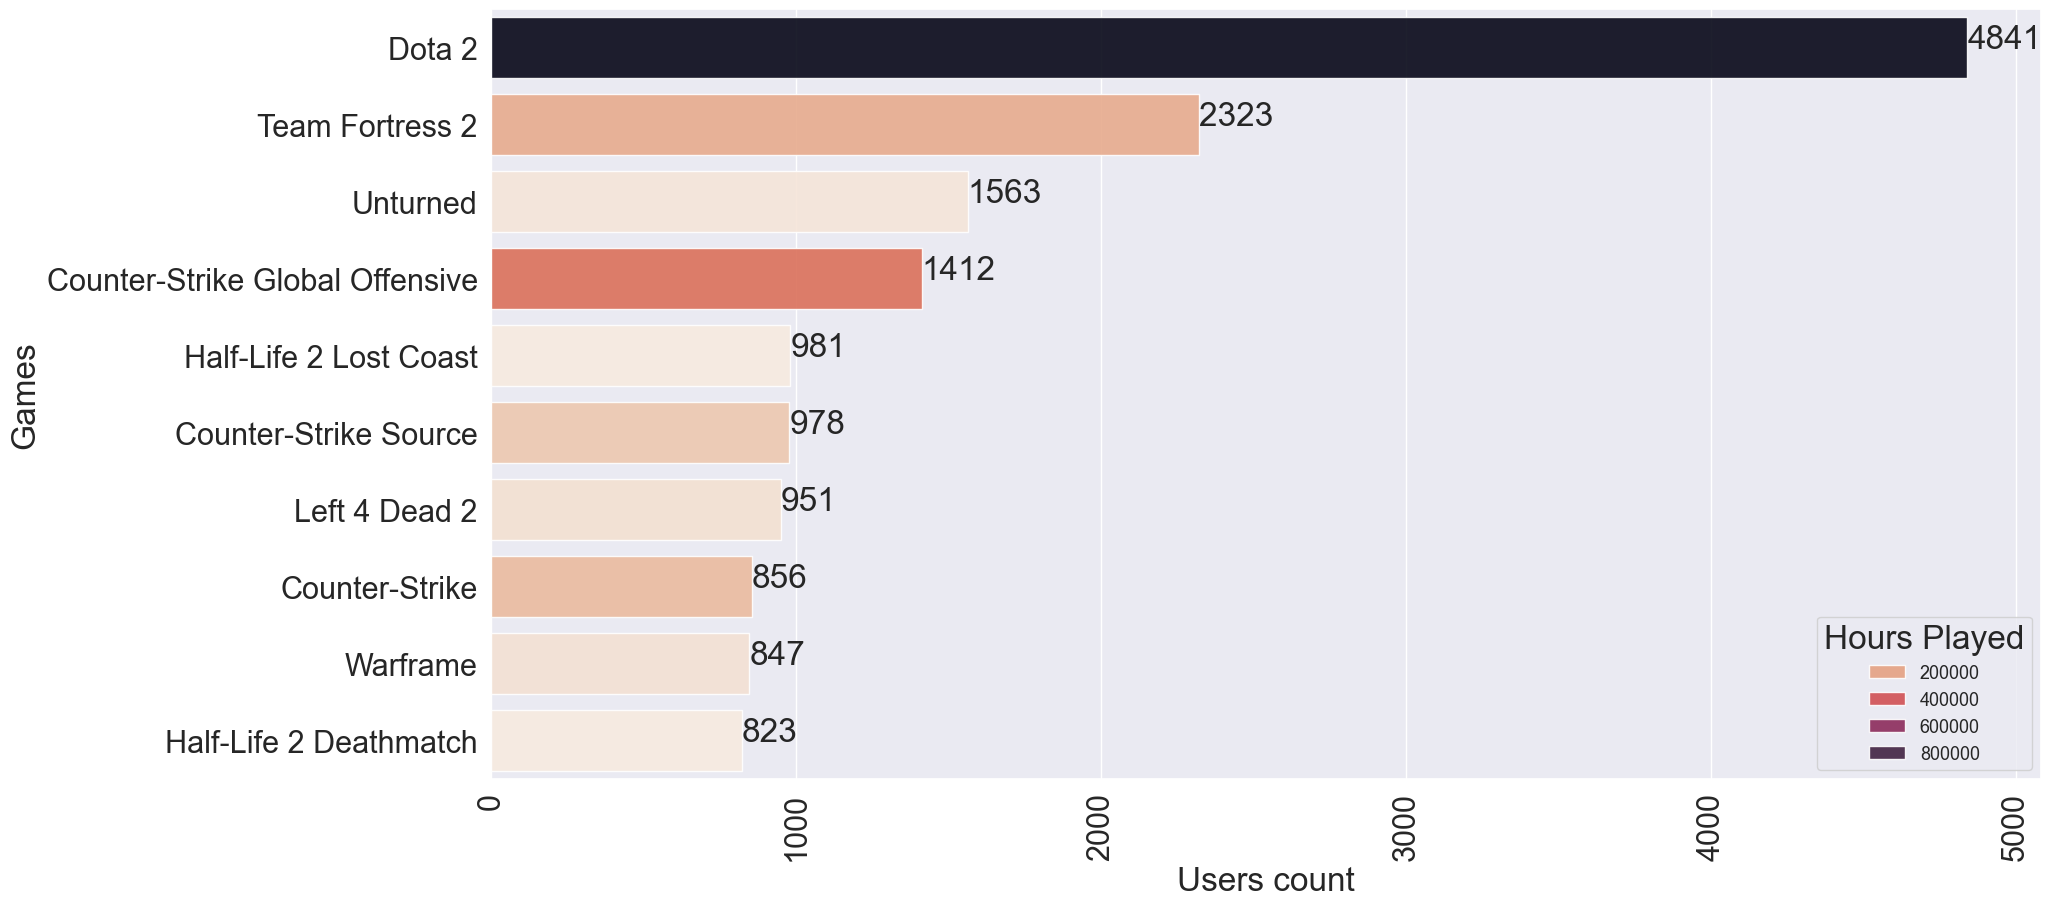

In [31]:
# plot histogram

plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='user', y='game', hue='hours',alpha=0.9,data=top10user, palette='rocket_r',dodge=False)
ax.set(xlabel='Users count', ylabel='Games')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(fontsize=13, title='Hours Played')
for index, value in enumerate(top10user.user):
    plt.text(value, index, str(value))
plt.show()

We can see that there is a relationship between the number of hours played and the number of hours purchased for some games. For instance, we can see that the most popular game is 'Dota 2' which has the most users and the most hours played.

On the other hand, we can also see that this is not the case for all games. For example, if we look at the total hours played for 'Half-Life 2' we can see that it has the most users (981) but the least amount of hours played (184 hours).

This could be due to the fact that this game was bought as part of a bundle which is usually a free game called 'pack-in'.

Games like this add noise to your dataset.

### To get a better picture of how the user data is distributed and how the user plays, we create a box plot for the 20th most played game based on the total number of hours played.

In [32]:
#Finding top 10 most played games (by hours)
cleaned_df.groupby(cleaned_df['game'])['hours'].sum().sort_values(ascending=False).head(10)

game
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Name: hours, dtype: float64

In [33]:
df_hours = cleaned_df.sort_values(['hours'], ascending=False)

In [34]:
df_hours=cleaned_df[cleaned_df['game'].isin(['Dota 2','Counter-Strike Global Offensive','Team Fortress 2',
                                             'Counter-Strike',"Sid Meier's Civilization V",'Counter-Strike Source', 
                                             'The Elder Scrolls V Skyrim',"Garry's Mod",
                                             'Call of Duty Modern Warfare 2 - Multiplayer','Left 4 Dead 2'])]
df_hours

,user,game,purchase_play,hours,purchase,play
2,5250,Counter-Strike,purchase,0.0,1,0
3,5250,Counter-Strike Source,purchase,0.0,1,0
7,5250,Dota 2,purchaseplay,0.2,1,1
19,5250,Team Fortress 2,purchaseplay,0.8,1,1
30,76767,Call of Duty Modern Warfare 2 - Multiplayer,purchaseplay,165.0,1,1
...,...,...,...,...,...,...
128788,309262440,Team Fortress 2,purchaseplay,1.2,1,1
128794,309404240,Team Fortress 2,purchaseplay,2.2,1,1
128797,309434439,Dota 2,purchaseplay,0.8,1,1
128802,309824202,Dota 2,purchaseplay,0.7,1,1


In [35]:
df_hours['game'] = pd.Categorical(df_hours['game'],  ['Dota 2','Counter-Strike Global Offensive',
                                                      'Team Fortress 2','Counter-Strike',"Sid Meier's Civilization V",
                                                      'Counter-Strike Source', 'The Elder Scrolls V Skyrim',
                                                      "Garry's Mod",'Call of Duty Modern Warfare 2 - Multiplayer',
                                                      'Left 4 Dead 2'])
df_hours = df_hours.sort_values("game")

C:\Users\Raj\AppData\Local\Temp\ipykernel_11872\170238952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['game'] = pd.Categorical(df_hours['game'],  ['Dota 2','Counter-Strike Global Offensive',


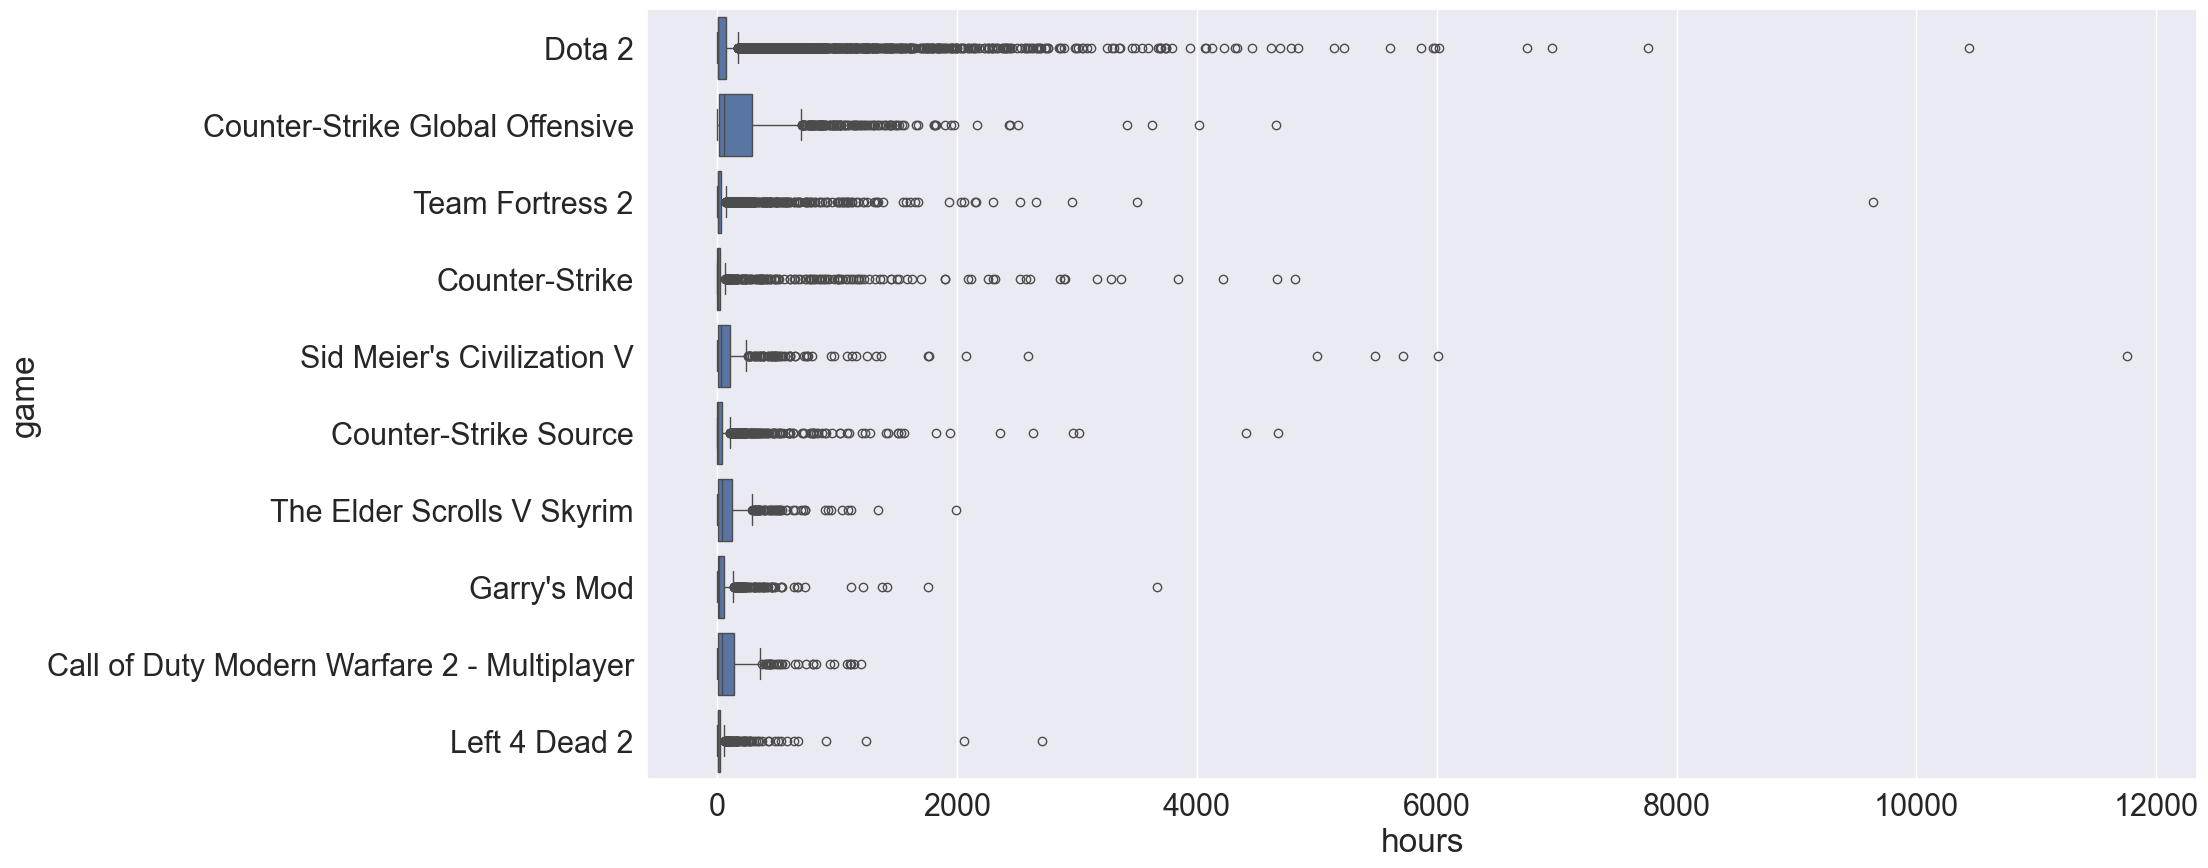

In [36]:
plt.figure(figsize=(20,10))
# plt.title('Boxplot: Top 10 most played games based on Total no. of Hours')
sns.boxplot(data=df_hours, x=df_hours.hours,y=df_hours.game)
plt.show()

As you can see, the distribution of the data for each of the games considered is not homogeneous. In fact, 75% of the data points for each games are in the hundreds of hours range, with some games having very high outliers. For example, we can see that a user has played over 10,000 hours of ‘Dota 2’. Another interesting example is that a top user in terms of playing hours has played over 12,000 hours of 'Sid Meier's Civilization V'. This graph shows that there are hardcore gamers who spend a lot of time on their favorite games, or professional gamers who play the game to improve their skills. These users have contributed a huge portion of the total hours of the game played by all the users. Therefore, it might not be a good idea to rely on the total number of hours played to form the recommender system. The second reason could be that the game is time-consuming in nature, which is why users spend a lot of hours on it. However, this does not necessarily mean that the game is good.

In [39]:
# Finding out how many purchased but did not play
print("Total game purchases : {0}".format(len(cleaned_df.loc[cleaned_df['purchase'] == 1])))
print("Total game plays : {0}".format(len(cleaned_df.loc[cleaned_df['play'] == 1])))
print("Number of purchased games not played : {0}".format((len(cleaned_df.loc[cleaned_df['purchase'] == 1]))-(len(cleaned_df.loc[cleaned_df['play'] == 1]))))
user_filter=((cleaned_df["play"]==0))
print("Number of users who purchased game without playing: {0}".format(cleaned_df[user_filter]["user"].nunique()))

Total game purchases : 128804
Total game plays : 70477
Number of purchased games not played : 58327
Number of users who purchased game without playing: 5953
